In [3]:
# Import tensorflow and load 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.preprocessing.image import ImageDataGenerator



# Load the dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
# Loading the Dataset.
train_dataset = tf.keras.utils.image_dataset_from_directory( '/content/drive/MyDrive/Group_Project_Data/Train', image_size=(64,64), label_mode='binary', batch_size=256,
    color_mode='grayscale'
)

val_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Group_Project_Data/Valid', image_size=(64,64),label_mode='binary',  batch_size=256,
    color_mode='grayscale'
)
# Preprocess the datasets
train_dataset = train_dataset.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
val_dataset = val_dataset.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))


# Unpack images and labels
X_train, y_train = next(iter(train_dataset))
X_test, y_test = next(iter(val_dataset))



Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


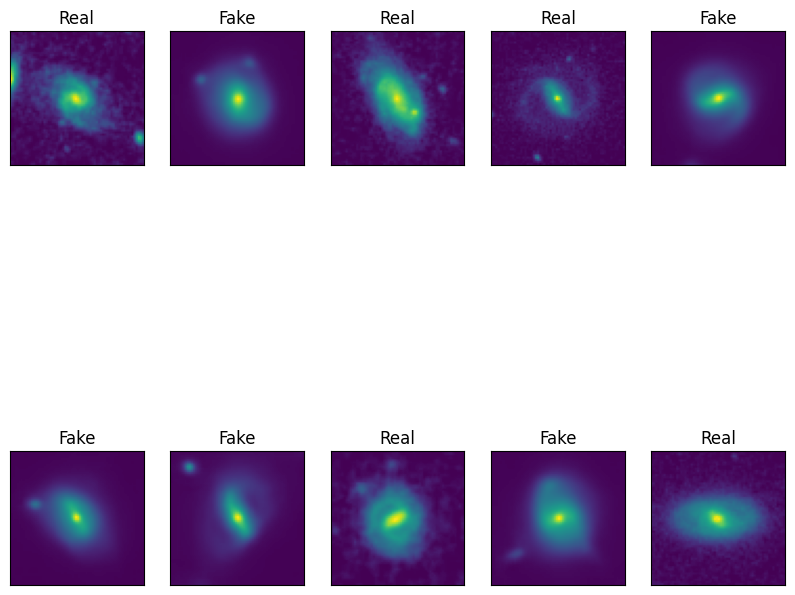

In [5]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5, figsize=(10, 10))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(X_train[i,:,:,0])
    if y_train[i] == 1:
        ax[i].set_title('Real')
    else:
        ax[i].set_title('Fake')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [53]:
### Create the layers for the CNN model, using the Functional API
# Input, Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras import layers, models

Inp = layers.Input((64,64,1), dtype='float32', name='Model_Input')
Conv1 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_1')(Inp)
Pool1 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_1')(Conv1)
Conv2 = layers.Conv2D(64, (3,3), activation='relu',
                      padding='same', name='conv_2')(Pool1)
Pool2 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_2')(Conv2)
Conv3 = layers.Conv2D(128, (3,3), activation='relu',
                      padding='same', name='conv_3')(Pool2)
Pool3 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_3')(Conv3)
Flat = layers.Flatten()(Pool3)
Dense1 = layers.Dense(64, activation='relu', name='fc_1')(Flat)
Dense2 = layers.Dense(1, name='fc_2')(Dense1)
output = layers.Activation('sigmoid', name='sigmoid')(Dense2)





In [54]:
### Create the model, using the input and output tensors you have define above.
### Display the model summary.
# models.Model

galaxy_model = models.Model(inputs=Inp, outputs=Dense2)
galaxy_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Model_Input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       73856     
                                                                 
 pool_3 (MaxPooling2D)       (None, 8, 8, 128)         0   

In [55]:
### Compile the model with the Adam optimizer, Sparse Categorical Crossentropy
### loss (from_logits=True), and the accuracy metric
# optimizers.Adam, losses.SparseCategoricalCrossentropy
from tensorflow.keras import losses, optimizers

galaxy_model.compile(optimizer=optimizers.Adam(),
                    loss=losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

In [56]:



history = galaxy_model.fit(x=X_train, y=y_train, epochs=25,
                          validation_data=(X_test, y_test),
                          batch_size=512, callbacks=[
                              callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
                          ])

 
   

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 3.0218 - accuracy: 0.5312 - val_loss: 0.7105 - val_accuracy: 0.5078
Epoch 2/25
1/1 [==============================] - 0s 93ms/step - loss: 0.6950 - accuracy: 0.5312 - val_loss: 0.6512 - val_accuracy: 0.5117
Epoch 3/25
1/1 [==============================] - 0s 93ms/step - loss: 0.6734 - accuracy: 0.4922 - val_loss: 1.2119 - val_accuracy: 0.4961
Epoch 4/25
1/1 [==============================] - 0s 92ms/step - loss: 1.3040 - accuracy: 0.4688 - val_loss: 1.1471 - val_accuracy: 0.4961
Epoch 5/25
1/1 [==============================] - 0s 89ms/step - loss: 1.1538 - accuracy: 0.4688 - val_loss: 0.6953 - val_accuracy: 0.4961
Epoch 6/25
1/1 [==============================] - 0s 95ms/step - loss: 0.7273 - accuracy: 0.4688 - val_loss: 0.6339 - val_accuracy: 0.5586
Epoch 7/25
1/1 [==============================] - 0s 99ms/step - loss: 0.6502 - accuracy: 0.5312 - val_loss: 0.6232 - val_accuracy: 0.7734
Epoch 8/25
1/1 [=============

Text(0.5, 1.0, 'Model Accuracy')

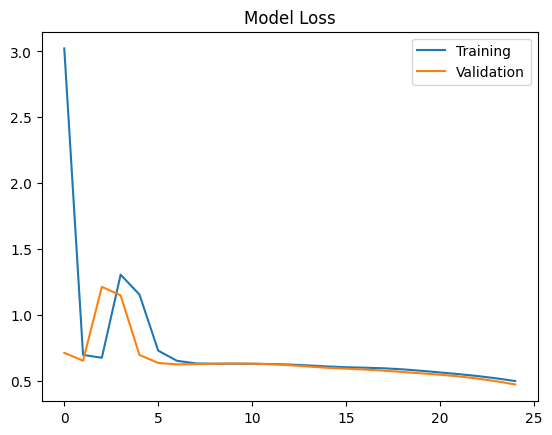

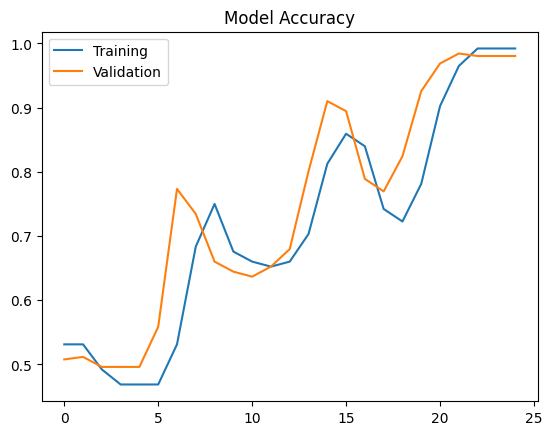

In [57]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')



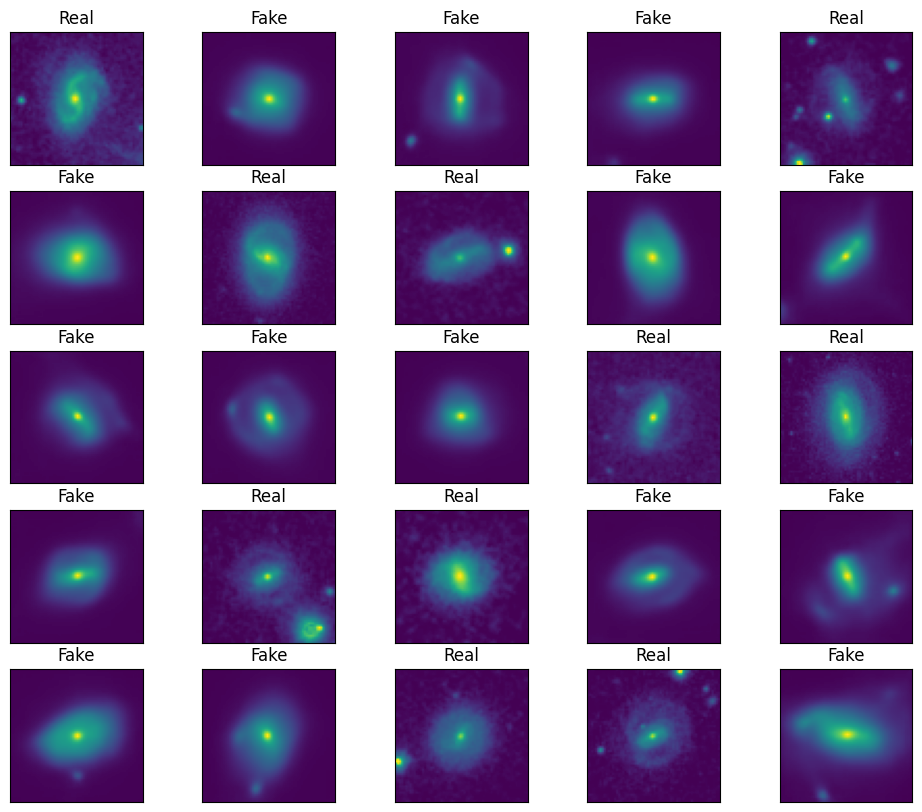

In [58]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(5,5, figsize = (12,10))
ax = ax.flatten()

for i in range(25):
  ax[i].imshow(X_test[i,:,:,0])
  if y_test[i] == 1:
        ax[i].set_title('Real')
  else:
        ax[i].set_title('Fake')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
plt.show()
